# <font color = magenta> **Simulação Inicial de Cinética Química - Introdução**

In [1]:
#Descrever a física das bolinhas e das movimentações, a fundamentação teórica da simulação. 
# (se possível, usar refefrências do livro que o professor indicou)

## Descrição do movimento de partículas

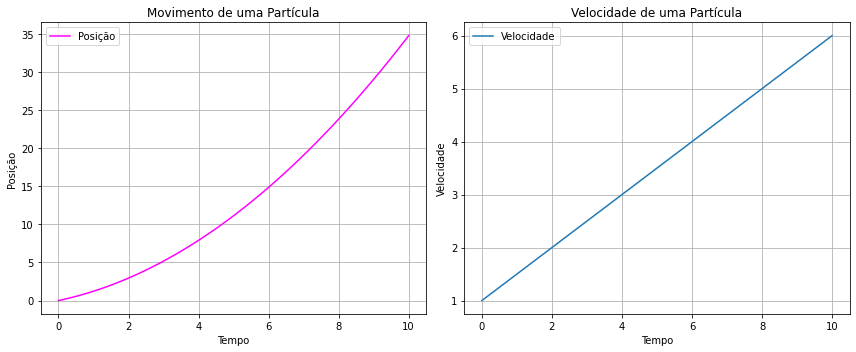

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Parâmetros do movimento
posicao_inicial = 0.0  # Posição inicial da partícula
velocidade_inicial = 1.0  # Velocidade inicial da partícula
aceleracao = 0.5  # Aceleração da partícula

# Tempo
tempo_inicial = 0.0
tempo_final = 10.0
passo_tempo = 0.1
num_pontos = int((tempo_final - tempo_inicial) / passo_tempo) + 1

# Arrays para armazenar os valores ao longo do tempo
tempos = np.linspace(tempo_inicial, tempo_final, num_pontos)
posicoes = np.zeros(num_pontos)
velocidades = np.zeros(num_pontos)

# Inicialização das condições iniciais
posicoes[0] = posicao_inicial
velocidades[0] = velocidade_inicial

# Simulação do movimento
for i in range(1, num_pontos):
    posicoes[i] = posicoes[i - 1] + velocidades[i - 1] * passo_tempo
    velocidades[i] = velocidades[i - 1] + aceleracao * passo_tempo

# Plot dos resultados
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Posição
axes[0].plot(tempos, posicoes, label='Posição', color='magenta')
axes[0].set_xlabel('Tempo')
axes[0].set_ylabel('Posição')
axes[0].set_title('Movimento de uma Partícula')
axes[0].legend()
axes[0].grid(True)

# Velocidade
axes[1].plot(tempos, velocidades, label='Velocidade')
axes[1].set_xlabel('Tempo')
axes[1].set_ylabel('Velocidade')
axes[1].set_title('Velocidade de uma Partícula')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Neste código, a partícula está se movendo em uma dimensão com uma aceleração constante. A equação da cinemática utilizada é:

**Posição = Posição Inicial + Velocidade Inicial * Tempo + 0.5 * Aceleração * Tempo^2**

A velocidade é atualizada a cada passo de tempo de acordo com a aceleração:

**Nova Velocidade = Velocidade Antiga + Aceleração * Passo de Tempo**

## Instalações

In [3]:
pip install pygame


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: c:\venv\ilumpy\Scripts\python.exe -m pip install --upgrade pip


## ``Movimentação das Partículas em 2D``

## Importações

In [4]:
import pygame
import random
import math

pygame 2.5.1 (SDL 2.28.2, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Código

## Variáveis

Aqui estamos definindo várias configurações iniciais para a simulação, incluindo as dimensões da janela, a cor de fundo, o raio das bolinhas, a massa das bolinhas, a m para a distribuição de Maxwell-Boltzmann, a cor padrão das bolinhas e o número total de bolinhas na simulação

In [5]:
# Configurações
WIDTH, HEIGHT = 800, 600
BACKGROUND_COLOR = (255, 255, 255)
BALL_RADIUS = 10
MASS = 1.0
TEMPERATURE = 300  # Em Kelvin
BALL_COLOR = (0, 0, 255)
NUM_BALLS = 10 # Número total de bolinhas na simulação

## Velocidade

Esta função, maxwell_boltzmann_speed(), implementa a amostragem de velocidades da distribuição de Maxwell-Boltzmann. Ela utiliza a fórmula da distribuição para gerar velocidades aleatórias seguindo essa distribuição.

In [6]:
# Função para amostrar velocidades da distribuição de Maxwell-Boltzmann
def maxwell_boltzmann_speed():
    v = 1/4 * math.sqrt(-2 * (TEMPERATURE / MASS) * math.log(random.uniform(0, 1)))
    return v

## Colisões

Aqui temos a função elastic_collision(ball1, ball2) que calcula a colisão elástica entre duas bolinhas, ball1 e ball2. Ela verifica se a distância entre as bolinhas é menor ou igual a duas vezes o raio das bolinhas, indicando uma colisão. Se houver colisão, os ângulos de colisão e as velocidades são usados para calcular as novas velocidades após a colisão elástica.

In [7]:
# Função para calcular a colisão elástica entre duas esferas
def elastic_collision(ball1, ball2):
    dx = ball2.x - ball1.x
    dy = ball2.y - ball1.y
    distance = math.sqrt(dx ** 2 + dy ** 2)
    
    if distance <= 2 * BALL_RADIUS:
        angle = math.atan2(dy, dx)
        v1 = math.sqrt(ball1.vx ** 2 + ball1.vy ** 2)
        v2 = math.sqrt(ball2.vx ** 2 + ball2.vy ** 2)
        phi = math.atan2(ball2.y - ball1.y, ball2.x - ball1.x)

        # Cálculo das novas velocidades após a colisão elástica
        ball1.vx = v2 * math.cos(angle - phi)
        ball1.vy = v2 * math.sin(angle - phi)
        ball2.vx = v1 * math.cos(angle - phi + math.pi)
        ball2.vy = v1 * math.sin(angle - phi + math.pi)

## Pygame

Essas linhas inicializam o Pygame, criam uma janela de exibição com as dimensões especificadas e definem o título da janela.

In [8]:
# Inicialização do Pygame
pygame.init()
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Simulação de Distribuição de Maxwell-Boltzmann")

##  Classes 

Aqui definimos a classe Ball para representar as bolinhas na simulação. No método __init__, definimos as posições iniciais, velocidades aleatórias usando a função maxwell_boltzmann_speed(), e a cor das bolinhas. Os métodos update() e draw() são responsáveis por atualizar a posição das bolinhas e desenhá-las na tela.

In [9]:
# Classe para representar as bolinhas
class Ball:
    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.vx = maxwell_boltzmann_speed()
        self.vy = maxwell_boltzmann_speed()
        self.color = color

    def update(self):
        self.x += self.vx
        self.y += self.vy

        if self.x < BALL_RADIUS or self.x > WIDTH - BALL_RADIUS:
            self.vx *= -1
        if self.y < BALL_RADIUS or self.y > HEIGHT - BALL_RADIUS:
            self.vy *= -1

    def draw(self):
        pygame.draw.circle(screen, self.color, (int(self.x), int(self.y)), BALL_RADIUS)


## Bolinhas

Aqui criamos uma lista balls contendo duas bolinhas iniciais, uma azul (BALL_COLOR) e uma vermelha (255, 0, 0).

In [10]:
# Lista para armazenar as bolinhas
balls = [Ball(WIDTH * 0.4, HEIGHT * 0.5, BALL_COLOR),
         Ball(WIDTH * 0.6, HEIGHT * 0.5, (255, 0, 0))]  # Definindo cores diferentes para as duas bolinhas iniciais


Aqui, o ``loop for`` cria mais bolinhas para a simulação. Metade dessas bolinhas terá a cor vermelha e a outra metade terá a cor azul. Isso é feito usando a variável color e a lógica condicional.

In [11]:
# Adicionando mais bolinhas
for i in range(NUM_BALLS - 2):
    if i < (NUM_BALLS - 2) // 2:
        color = (255, 0, 0)  # Cor vermelha
    else:
        color = BALL_COLOR  # Cor azul

    balls.append(Ball(random.randint(BALL_RADIUS, WIDTH - BALL_RADIUS),
                      random.randint(BALL_RADIUS, HEIGHT - BALL_RADIUS),
                      color))

Para finalizar o código, essa parte controla o loop principal da simulação, onde as bolinhas são atualizadas, desenhadas na tela e as colisões elásticas são tratadas.

In [12]:
# Loop principal
running = True
clock = pygame.time.Clock()

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    screen.fill(BACKGROUND_COLOR)

    for ball in balls:
        ball.update()
        ball.draw()

    # Detecção de colisão e colisões elásticas
    for i in range(len(balls)):
        for j in range(i + 1, len(balls)):
            elastic_collision(balls[i], balls[j])

    pygame.display.flip()
    clock.tick(60)

pygame.quit()

## Descrevendo o movimento de Colisão presente no código 

Quando duas bolinhas colidem em uma simulação, é importante __preservar a conservação da energia cinética e do momento linear__, que são princípios fundamentais na física. Isso significa que, após a colisão, a soma das energias cinéticas das bolinhas deve ser a mesma, assim como a soma dos momentos lineares.

``Conservação da Energia Cinética``  $\frac{1}{2} m_1 v_1^2 + \frac{1}{2} m_2 v_2^2 = \frac{1}{2} m_1 {v'}_1^2 + \frac{1}{2} m_2 {v'}_2^2 $

``Conservação do Momento Linear`` $m_1 v_1 + m_2 v_2 = m_1 {v'}_1 + m_2 {v'}_2 $


A abordagem de colisões elásticas assume que a energia total (cinética e potencial) das partículas se conserva durante a colisão. Portanto, a colisão é considerada perfeitamente elástica, onde não há perda de energia cinética. Assim, é preciso alguns passos para calcular as novas velocidades após uma colisão elástica:

- Determinar a geometria da colisão: Primeiro, é necessário calcular a direção do vetor que conecta o centro de uma bolinha à outra bolinha que está colidindo. Isso é feito usando as coordenadas das bolinhas envolvidas na colisão.

- Calcular os ângulos de colisão: Usando a direção do vetor de colisão, podemos calcular o ângulo que esse vetor faz com o eixo x. Isso é importante para determinar a direção das velocidades após a colisão.

- Calcular as velocidades escalares iniciais: As velocidades das bolinhas antes da colisão são representadas pelas magnitudes das velocidades (escalares). Isso é calculado usando a fórmula da velocidade, que é a raiz quadrada da soma dos quadrados das velocidades nos eixos x e y.

- Calcular o ângulo entre o vetor de colisão e as velocidades iniciais: Esse ângulo, chamado de ângulo de diferença de fase, é calculado a partir das coordenadas das bolinhas envolvidas.

- Calcular as novas velocidades: Usando a conservação do momento linear e a conservação da energia cinética, as novas velocidades das bolinhas após a colisão são calculadas. As componentes x e y das velocidades são separadas e atualizadas de acordo com as fórmulas de colisão elástica.

As fórmulas usadas para atualizar as velocidades são:

Onde v1 e v2 são as velocidades escalares das duas bolinhas antes da colisão, angle é o ângulo entre a linha de colisão e o eixo x, e phi é o ângulo entre o vetor de colisão e o eixo x. Essas fórmulas derivam da aplicação das equações de conservação de energia cinética e momento linear.

``Conclusão da colisão:`` Após calcular as novas velocidades, as bolinhas continuarão se movendo com suas novas velocidades, respeitando as leis da física e a conservação das propriedades mencionadas. É uma maneira simplificada de simular interações de partículas em simulações computacionais.

In [13]:
#melhorar a direção das colisões, que estão só no eixo x